# Preparing stuff

In [106]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from collections import OrderedDict
import ast
import Bio.PDB
from Bio import SeqIO
from IPython.display import display
%matplotlib inline
%run 'functions_dump.py'
notebook_prefix = 'ks02'
image_counter = Counter()

### Orienting myself

In [2]:
karen_folder = os.getcwd()
analysis_folder = os.path.dirname(os.getcwd())
root_folder = os.path.dirname(analysis_folder)
data_folder = os.path.join(root_folder, 'Data')
figures_folder = os.path.join(karen_folder, 'figures')
small_tables_folder = os.path.join(root_folder, 'Data_Small_Tables')
files_dump_folder = os.path.join(karen_folder, 'files_dump')
structure_predictions_folder = os.path.join(files_dump_folder, 'structure_predictions')

### Reading the data

In [3]:
data_all = OrderedDict()
files = [f for f in os.listdir(data_folder) if '.csv' in f]
for f in sorted(files, key = lambda s: int(s.split('_')[0][1:])):
    data_all[f[:-9]] = pd.read_table(os.path.join(data_folder, f))

### Working with positions

In [4]:
def remove_gaps(seq):
    return ''.join([c for c in seq if c != '-'])

def get_wt_position(position_in_alignment):
    truncated_seq = remove_gaps(aligned_Scer[:position_in_alignment+1])
    return len(truncated_seq)

In [30]:
Scer_Uniprot = open(os.path.join(files_dump_folder, 'HIS3_saccharomyces_cerevisiae_from_Uniprot_P06633.txt')).read().rstrip()
alignment_file = os.path.join(small_tables_folder, 'aa_seq.txt')
for seq_record in SeqIO.parse(alignment_file, 'fasta'):
    if seq_record.id == 'Scer':
        aligned_Scer = str(seq_record.seq)
        break
assert remove_gaps(aligned_Scer) == Scer_Uniprot

In [78]:
positions = pd.read_table(os.path.join(small_tables_folder, 'positions.csv'))
positions = positions.set_index('Unnamed: 0').transpose().reset_index()
positions.rename(columns={'index' : 'segment', 'positions':'positions_alignment'}, inplace=True)
positions.reset_index(drop=True, inplace=True)
positions['positions_alignment'] = positions['positions_alignment'].apply(lambda s: ast.literal_eval(s))
positions['positions_Uniprot_P06633'] = positions.positions_alignment.apply(lambda l: [get_wt_position(p) for p in l])
segment_names = positions.segment.values # not explicitly sorted
positions.to_csv(os.path.join(files_dump_folder, 'information_about_segments.csv'), index=False)
positions

Unnamed: 0,segment,wt1,positions_alignment,len1,len2,start1,end1,wt2,start2,end2,positions_Uniprot_P06633
0,S1,EALGAVRGVK,"[140, 141, 142, 143, 144, 145, 146, 147, 148, ...",10,10,140,149,EALSRAVVDL,160,169,"[106, 107, 108, 109, 110, 111, 112, 113, 114, ..."
1,S2,SNRPYAVVE,"[170, 171, 172, 173, 174, 175, 176, 177, 178, ...",9,9,170,178,LSCEMIPHF,189,197,"[136, 137, 138, 139, 140, 141, 142, 143, 144, ..."
2,S3,LGLQREKVGD,"[179, 180, 181, 182, 183, 184, 185, 186, 187, ...",10,7,179,188,LESFAEA,198,204,"[145, 146, 147, 148, 149, 150, 151, 152, 153, ..."
3,S4,SRITLHVDCL,"[205, 206, 207, 208, 209, 210, 211, 212, 213, ...",10,10,205,214,SAFKALAVAI,225,234,"[171, 172, 173, 174, 175, 176, 177, 178, 179, ..."
4,S5,RGKNDHHRSE,"[215, 216, 217, 218, 219, 220, 221, 222, 223, ...",10,11,215,224,REATSPNGTND,235,251,"[181, 182, 183, 184, 185, 186, 187, 188, 189, ..."
5,S6,CGIALGQAFK,"[130, 131, 132, 133, 134, 135, 136, 137, 138, ...",10,10,130,139,RFGSGFAPLD,150,159,"[96, 97, 98, 99, 100, 101, 102, 103, 104, 105,..."
6,S7,IHALAKHSGW,"[100, 101, 102, 103, 104, 105, 106, 107, 108, ...",10,10,100,109,HIDDHHTTED,120,129,"[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 86, 8..."
7,S8,HTGIGFLDHM,"[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 110, ...",10,10,90,99,SLIVECIGDL,110,119,"[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 76, 7..."
8,S9,PEKEAE,"[66, 67, 68, 73, 74, 75, 82, 83, 84, 85, 86, 8...",6,8,66,75,TQSQVINV,82,89,"[36, 37, 38, 39, 40, 41, 48, 49, 50, 51, 52, 5..."
9,S10,IEHSIF,"[41, 42, 43, 44, 64, 65, 76, 77, 78, 79, 80, 81]",6,6,41,65,AVAEQA,76,81,"[30, 31, 32, 33, 34, 35, 42, 43, 44, 45, 46, 47]"


In [80]:
for e in positions.positions_Uniprot_P06633:
    print e

[106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
[136, 137, 138, 139, 140, 141, 142, 143, 144, 155, 156, 157, 158, 159, 160, 161, 162, 163]
[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 164, 165, 166, 167, 168, 169, 170]
[171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
[181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211]
[96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125]
[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
[36, 37, 38, 39, 40, 41, 48, 49, 50, 51, 52, 53, 54, 55]
[30, 31, 32, 33, 34, 35, 42, 43, 44, 45, 46, 47]
[13, 14, 15, 16, 17, 18, 25, 26, 27, 28, 29]
[6, 7, 8, 9, 10, 11, 12, 19, 20, 21, 22, 23, 24]


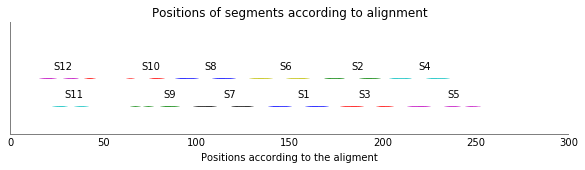

In [93]:
title = 'Positions of segments according to alignment'
plot_better(grid='', height=2)
old_y = 2
for row in positions.iterrows():
    for position in row[1].positions_alignment:
        new_y = np.random.choice([1,2])
        while new_y == old_y:
            new_y = np.random.choice([1,2])
    x = row[1].positions_alignment
    plt.plot(x, [new_y for e in x], '_', lw=3, alpha=0.7, label=row[1].segment)
    plt.text(np.median(x), new_y + 0.3, row[1].segment)
    old_y = new_y
plt.ylim(0,4)
plt.yticks([])
plt.xlabel('Positions according to the aligment')
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

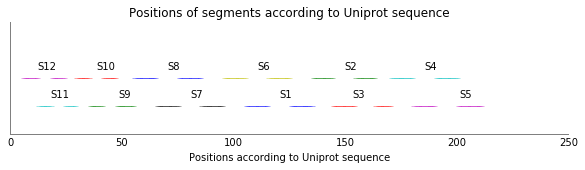

In [92]:
title = 'Positions of segments according to Uniprot sequence'
plot_better(grid='', height=2)
old_y = 2
for row in positions.iterrows():
    for position in row[1].positions_Uniprot_P06633:
        new_y = np.random.choice([1,2])
        while new_y == old_y:
            new_y = np.random.choice([1,2])
    x = row[1].positions_Uniprot_P06633
    plt.plot(x, [new_y for e in x], '_', lw=3, alpha=0.7, label=row[1].segment)
    plt.text(np.median(x), new_y + 0.3, row[1].segment)
    old_y = new_y
plt.ylim(0,4)
plt.yticks([])
plt.xlabel('Positions according to Uniprot sequence')
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

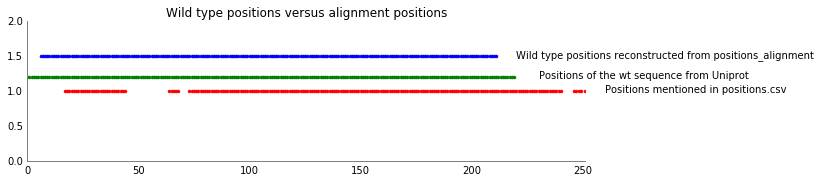

In [16]:
title = 'Wild type positions versus alignment positions'
ps = [item for sublist in positions.positions_alignment.values.flatten() for item in sublist]
wt_ps = [get_wt_position(p) for p in ps]

plot_better(height=2.5, grid='')

plt.plot(wt_ps, [1.5 for e in wt_ps], '.')
plt.text(220, 1.48, 'Wild type positions reconstructed from positions_alignment')

plt.plot(range(len(Scer_Uniprot)), [1.2 for e in range(len(Scer_Uniprot))], '.')
plt.text(230, 1.18, 'Positions of the wt sequence from Uniprot')

plt.plot(ps, [1 for e in ps], '.')
plt.text(260, 0.98, 'Positions mentioned in positions.csv')

plt.ylim(0,2)
plt.yticks()
plt.xlim(0, max([max(ps), len(Scer_Uniprot)]))
plt.title(title)
save_image(image_counter, title, figures_folder, notebook_prefix)

### Keeping only the mutants carrying substitutions (no indels, no mutations in the unmutated "central region")

In [17]:
data = OrderedDict()
for k,v in data_all.items():
    data[k] = v[(v.middle == 1) & (v.nogap == 1)]

## Simple graphs about the library structure

In [18]:
bar_color = '#6e6e83'

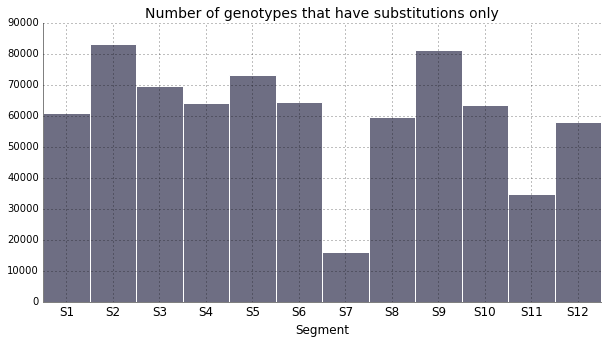

In [19]:
title = 'Number of genotypes that have substitutions only'

to_plot = [(segment_name.split('_')[0], len(segment)) for segment_name, segment in data.items()]
to_plot = zip(*to_plot)
x = np.arange(len(data))

plot_better()
bar_width = 1
plt.bar(x, to_plot[1], bar_width, edgecolor='white', color=bar_color)
plt.title(title, fontsize=14)
plt.xticks(x + bar_width/2., to_plot[0], rotation=0, fontsize=12)
plt.xlabel('Segment', fontsize=12)
save_image(image_counter, title, figures_folder, notebook_prefix)

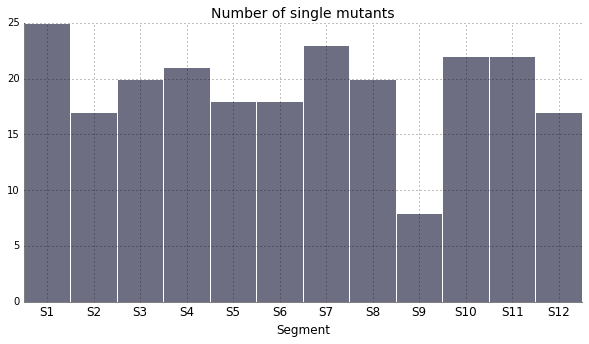

In [20]:
title = 'Number of single mutants'

to_plot = [(segment_name.split('_')[0], len(segment[segment.mut_list.str.count(':') == 0])) for segment_name, segment in data.items()]
to_plot = zip(*to_plot)
x = np.arange(len(data))

plot_better()
bar_width = 1
plt.bar(x, to_plot[1], bar_width, edgecolor='white', color=bar_color)
plt.title(title, fontsize=14)
plt.xticks(x + bar_width/2., to_plot[0], rotation=0, fontsize=12)
plt.xlabel('Segment', fontsize=12)
save_image(image_counter, title, figures_folder, notebook_prefix)

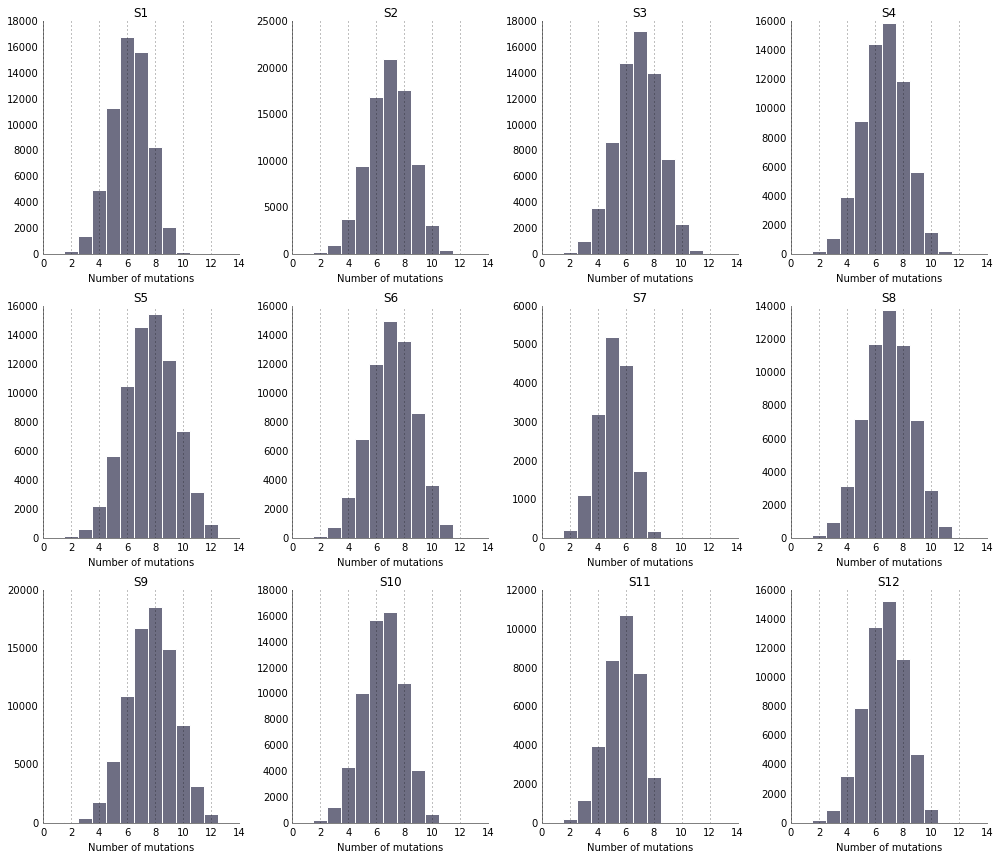

In [21]:
plot_better(width=14, height=12)
title = 'Distribution of mutants with different number of mutations'
for index, item in enumerate(data.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    mutant_distribution = np.array([len(segment[segment.mut_list.str.count(':') == mut_number-1]) for mut_number in range(1,13)])
    width = 1
    plt.bar(np.arange(len(mutant_distribution))+width/2., mutant_distribution, width, edgecolor='white', color=bar_color)
    improve_plot(ax, grid='x')
    plt.xlabel('Number of mutations')
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

## Fitness overview

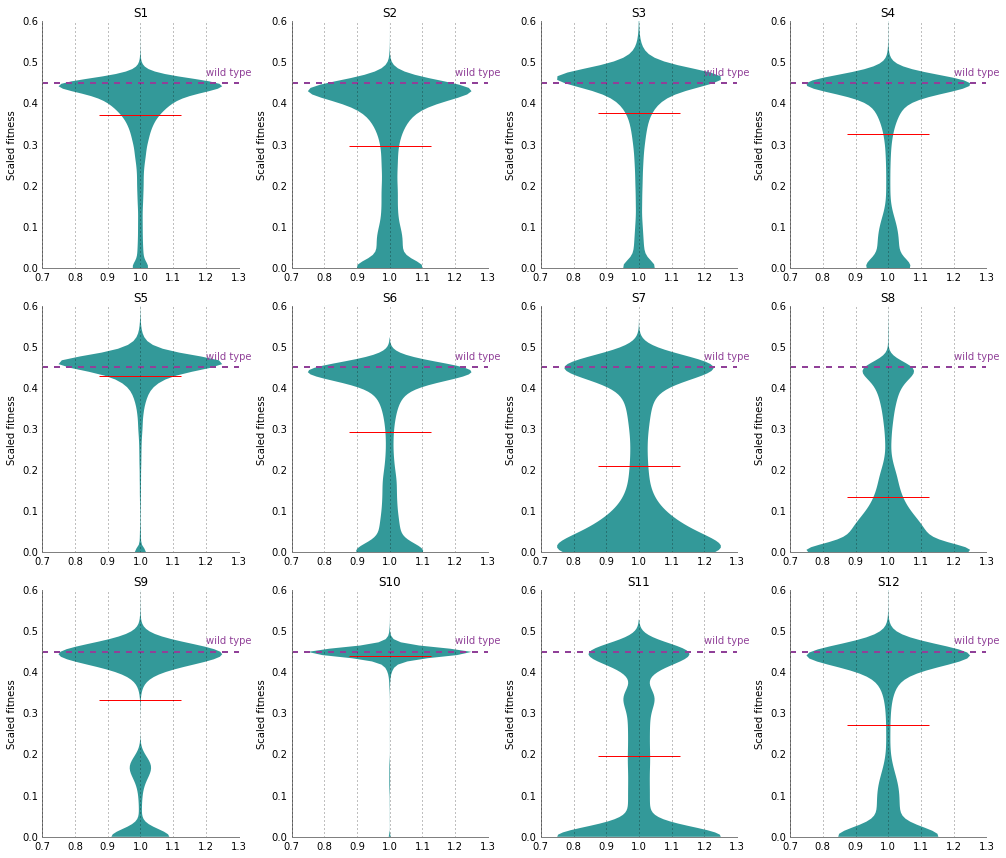

In [22]:
plot_better(width=14, height=12)
title = 'Distribution of mutants with different number of mutations'
facecolor = '#008080'
edgecolor = 'none'
wt_color = '#904098'
for index, item in enumerate(data.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    mutant_distribution = np.array([len(segment[segment.mut_list.str.count(':') == mut_number-1]) for mut_number in range(1,13)])
    width = 1

    vplot = plt.violinplot(segment.s.values, showmeans=True, showmedians=False, showextrema=False)
    for patch in vplot['bodies']:
        patch.set_facecolor(facecolor)
        patch.set_alpha(0.8)
        patch.set_edgecolor(edgecolor)
    plt.axhline(0.45, ls='--', color=wt_color, lw=2)
    plt.text(1.2, 0.47, 'wild type', color=wt_color, fontsize=10)
    improve_plot(ax, grid='x')
    plt.ylabel('Scaled fitness')
    plt.ylim(0,0.6)
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

# Protein structure

In [23]:
def calc_residue_dist(residue_one, residue_two):
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return np.sqrt(np.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain_one, chain_two):
    """Returns a matrix of C-alpha distances between two chains"""
    answer = np.zeros((len(chain_one), len(chain_two)), np.float)
    for row, residue_one in enumerate(chain_one):
        for col, residue_two in enumerate(chain_two) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer

def calc_dist_matrix_for_subsets(chain_one, chain_two, chain_one_subset, chain_two_subset):
    dist_matrix = np.zeros((len(chain_one), len(chain_two)), np.float)
    for row, residue_one in enumerate(chain_one):
        for col, residue_two in enumerate(chain_two):
            if row < chain_one_subset[1] and row > chain_one_subset[0]:
                if col < chain_two_subset[1] and col > chain_two_subset[0]:
                    dist_matrix[row, col] = calc_residue_dist(residue_one, residue_two)
    return dist_matrix

def calc_dist_matrix_for_subsets(chain, subset_one, subset_two):
    dist_matrix = np.zeros((len(chain), len(chain)), np.float)
    for row, residue_one in enumerate(chain):
        for col, residue_two in enumerate(chain):
            if row in subset_one and col in subset_two:
                    dist_matrix[row, col] = calc_residue_dist(residue_one, residue_two)
    return dist_matrix

### Parsing a PDB file

In [24]:
pdb_code = "model_01"
pdb_file = "files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb" #not the full cage!
structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_file)
model = structure[0]

#### Plotting distances

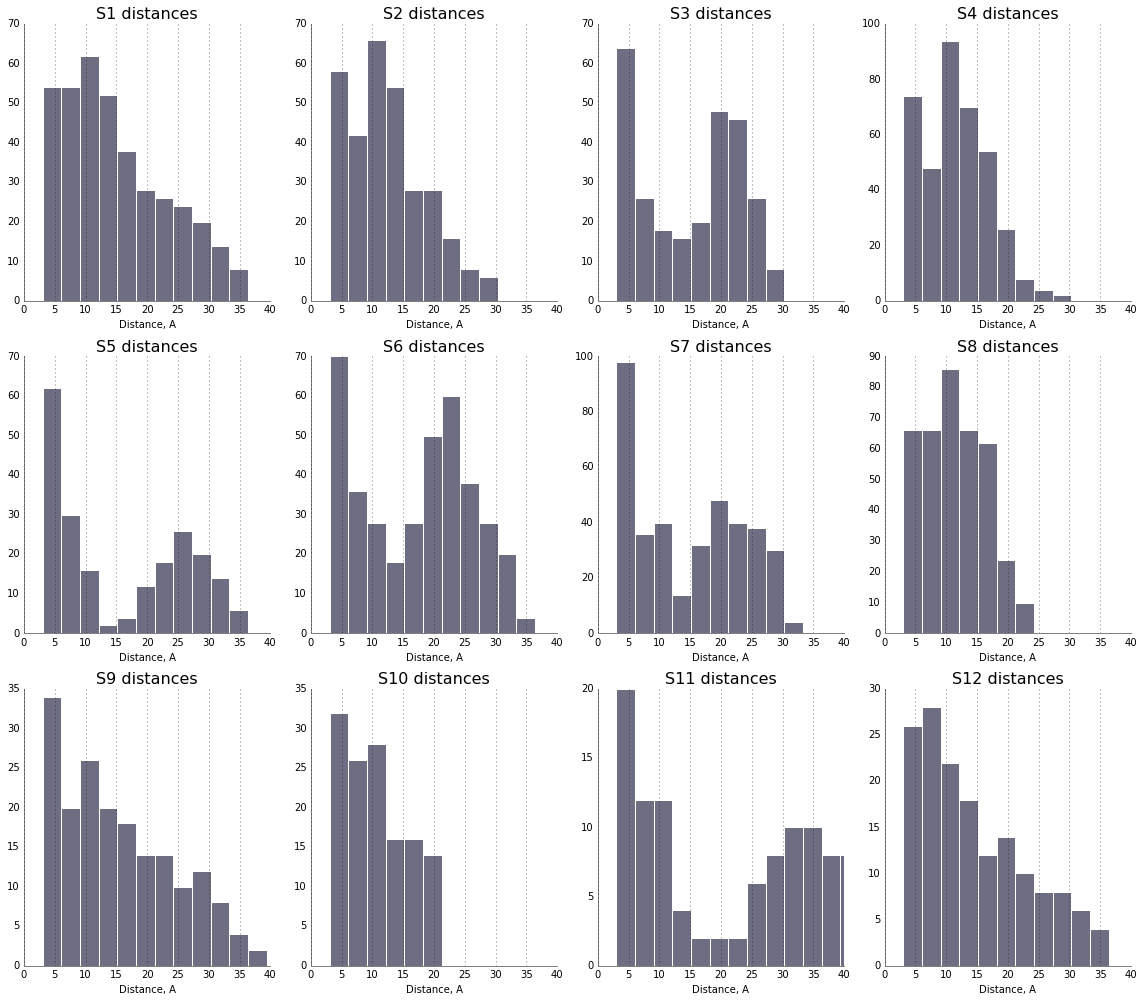

In [25]:
plot_better(width=16, height=14)
title = 'Distribution of distances\nbetween all pairs of mutated residues within a segment'

for index, segment_name in enumerate(segment_names):
#     segment_positions = positions[positions.segment == segment_name].positions.values[0]
#     segment_positions = ast.literal_eval(segment_positions)
    segment_seq = [positions[positions.segment == segment_name].wt1.values[0], positions[positions.segment == segment_name].wt2.values[0]]
    try:
        start1 = Scer_Uniprot.index(segment_seq[0])
        len1 = len(segment_seq[0])
        start2 = Scer_Uniprot.index(segment_seq[1])
        len2 = len(segment_seq[1])
        segment_positions = range(start1, start1 + len1) + range(start2, start2 + len2)
    except ValueError:
        print 'Shit happened with segment %s!\n(sequence is %s)' %(segment_name, segment_seq)
        continue
    distances = calc_dist_matrix_for_subsets(model["A"], segment_positions, segment_positions).flatten()
    distances = [e for e in distances if e > 0]
    
    ax = plt.subplot(len(segment_names)/4, 4, index+1)
    plt.title(segment_name + ' distances', fontsize=16)
    plt.hist(distances, edgecolor='white', color=bar_color, range=(0,100), bins=33)
    plt.xlim(0,40)
    plt.xlabel('Distance, A')
    improve_plot(ax, grid='x')
# plt.suptitle(title, fontsize=14)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

#### Calculating half-sphere exposure

In [27]:
from Bio.PDB import HSExposure, ExposureCN, HSExposureCA, HSExposureCB, is_aa
radius = 12.
hse=HSExposureCA(model, radius=radius)
hse=HSExposureCB(model, radius=radius)
hse=ExposureCN(model, radius=radius)

In [28]:
hse_a_ups = []
hse_a_downs = []
counter = 0
for r in model['A'].get_residues():
    if is_aa(r):
        counter += 1
        try:
            hse_a_ups.append(r.xtra["EXP_HSE_A_U"])
            hse_a_downs.append(r.xtra["EXP_HSE_A_D"])
        except:
            pass
hse_a_ups = np.array(hse_a_ups)
hse_a_downs = np.array(hse_a_downs)
print counter

205


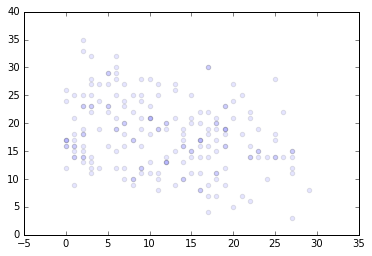

In [94]:
plt.scatter(hse_a_ups, hse_a_downs, alpha=0.1)

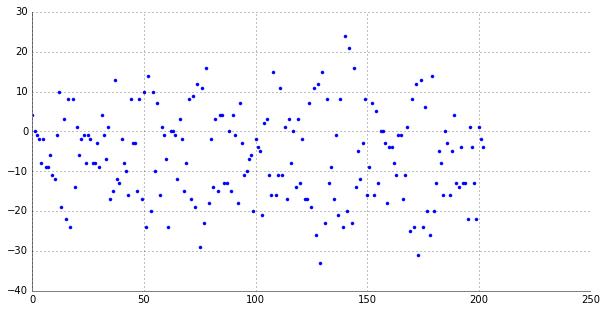

In [103]:
plot_better()
plt.plot(hse_a_ups-hse_a_downs, '.')

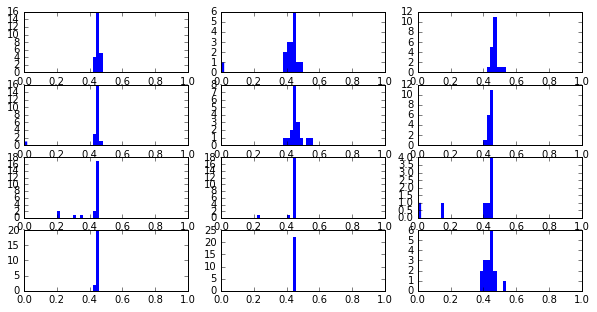

In [114]:
plot_better()
data_singles = OrderedDict()
counter = 1
for segment_name, segment_data in data.items():
    data_singles[segment_name] = segment_data[segment_data.mut_list.str.count(':') == 0]
#     display(data_singles[segment_name][['aa_seq', 'mut_list', 's']])
    ax = plt.subplot(4,3,counter)
    plt.hist(data_singles[segment_name].s.values, edgecolor='none', range=(0,1), bins=50)
    counter += 1